In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
pd.option_context('mode.use_inf_as_na', True)

In [3]:
df['price'].max()

7700000.0

In [4]:
df['price'].min()

75000.0

In [5]:
df['price'].mean()

540088.1417665294

## Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

1.1. Скачать следующие данные: kc-house-data и laptop_price

1.2. Изучите стоимости недвижимости

''

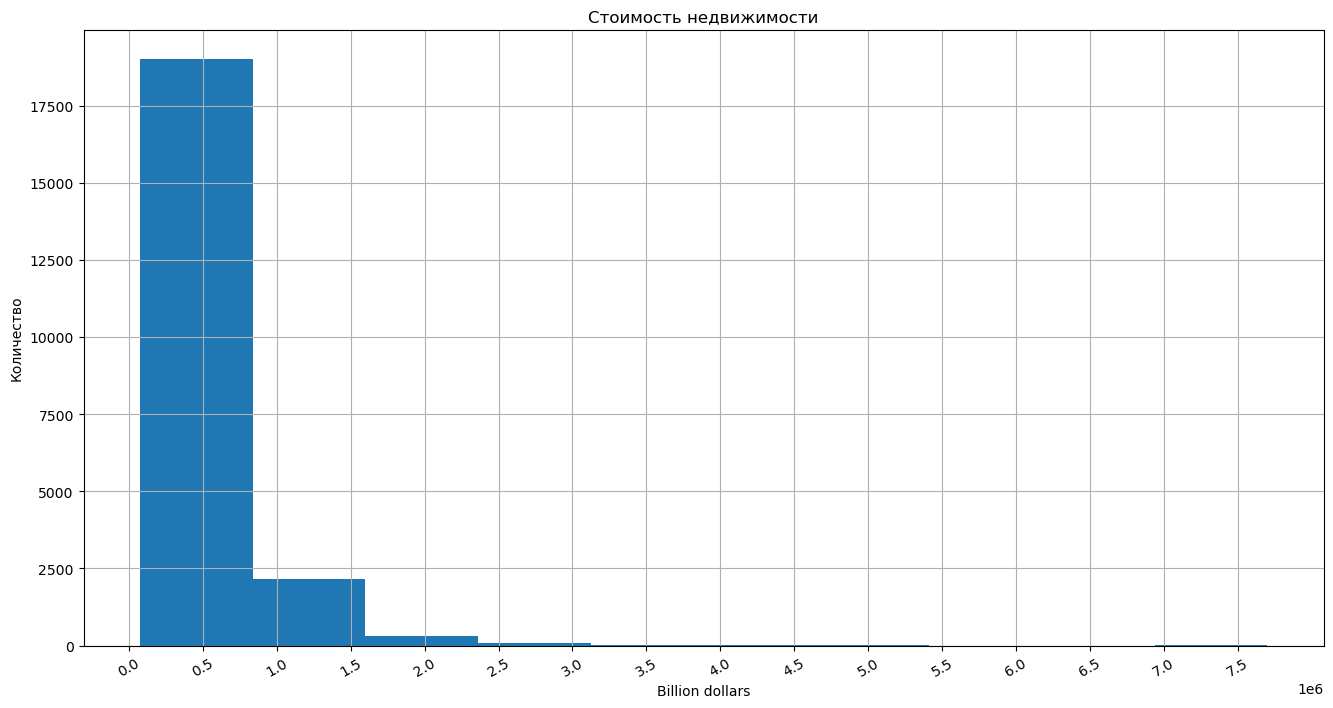

In [6]:
plt.figure(figsize=(16, 8))
plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Billion dollars')
plt.ylabel('Количество')
plt.xticks(range(0, 7800000, 500000), rotation=30)
plt.yticks(range(0, 17700, 2500))
plt.grid()
;

На данном графике видим, что распредлеение стоимости домов крайне неравномерное. Минимальная стоимость начинается с 75000.0, максимальная в размере 7700000.0. В основном стоимость домов варьируется в диапазоне от 100000 до 800000 долларов, что просматривается на графике. Домов, дороже 1600000 крайне мало.

1.3. Изучите распределение квадратуры жилой


''

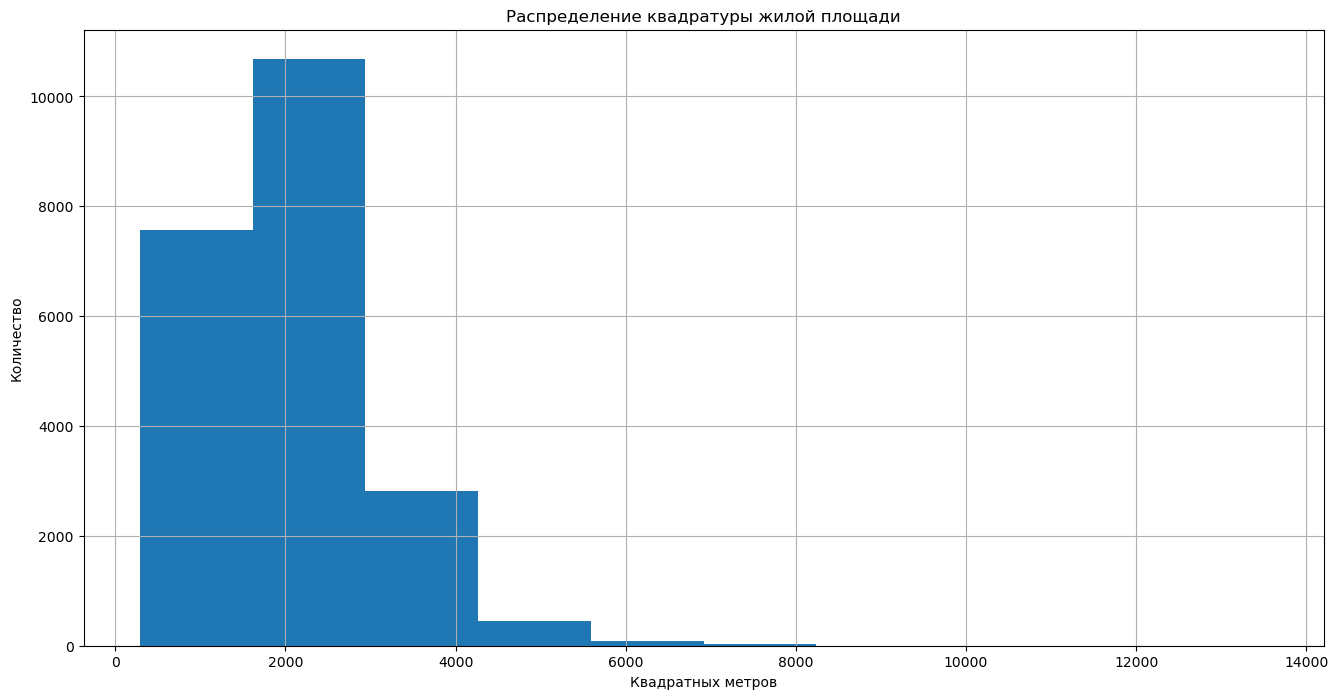

In [7]:
plt.figure(figsize=(16, 8))
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратных метров')
plt.ylabel('Количество')
plt.grid()
;

На графике видим, что большинство домов имеют жилую площадь в районе 1800 - 2400 кв.м. Также достаточно весомая доля приходится на дома, с жилой площадью в диапазоне от 250 до 1800 кв.м.

1.4. Изучите распределение года постройки

In [8]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20235,3303700221,20140627T000000,735000.0,3,2.25,1490,1212,2.0,0,0,...,9,1040,450,2011,0,98112,47.6226,-122.313,1490,1337


In [9]:
df['yr_built'].value_counts().sort_index(ascending=False)

yr_built
2015     38
2014    559
2013    201
2012    170
2011    130
       ... 
1904     45
1903     46
1902     27
1901     29
1900     87
Name: count, Length: 116, dtype: int64

''

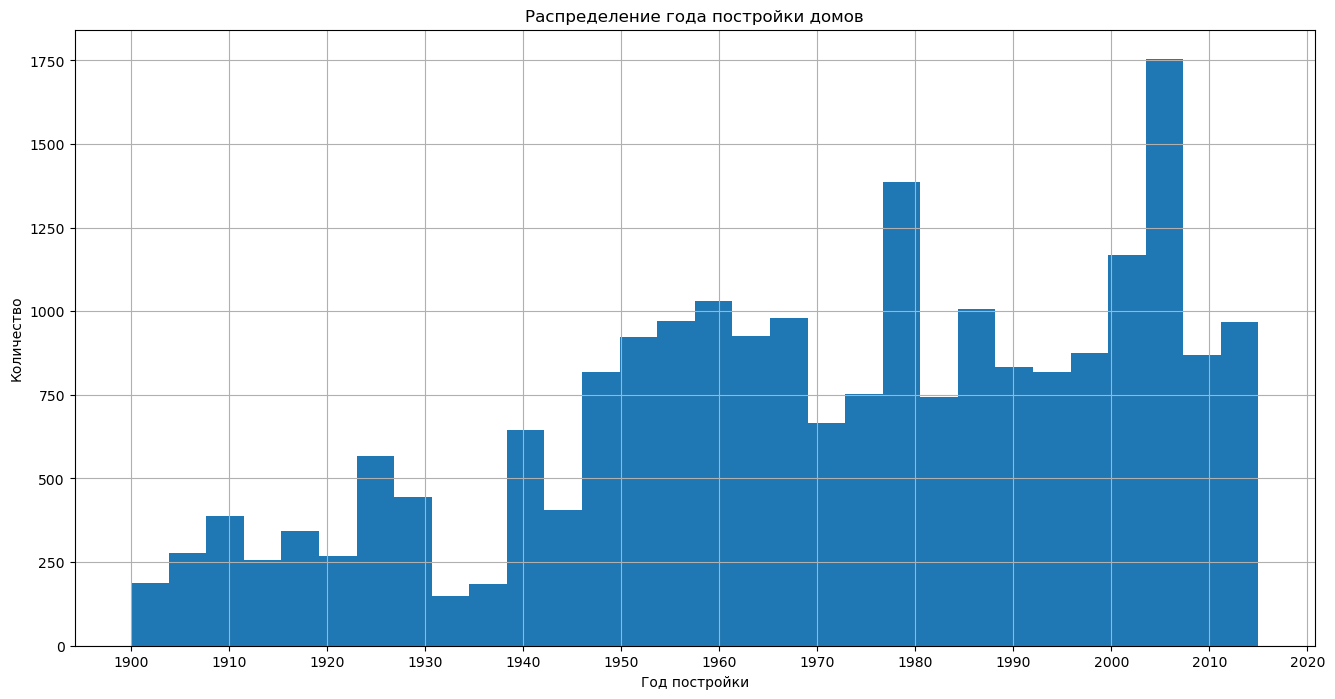

In [10]:
plt.figure(figsize=(16, 8))
plt.hist(df['yr_built'], bins=30)
plt.title('Распределение года постройки домов')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.xticks(range(1900, 2030, 10))
plt.grid()
;

На графике демонстрируется распределение года постройки домов. Отчетливо видно, что основная масса домов были построены, начиная со второй половины 40-х годов 20 века, а именно на самый конец 70-х (приблизительно 1400 домов). Пик пришелся на середину 00-х годов и составляет приблизительно 1750 домов.

## Условие 2: 2 задача
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы


In [11]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16393,7785000130,20150330T000000,926250.0,4,1.75,2390,17717,1.0,0,0,...,8,2390,0,1964,0,98040,47.5755,-122.218,2390,10730


In [12]:
waterfront_type = df['waterfront'].value_counts()
waterfront_type

waterfront
0    21450
1      163
Name: count, dtype: int64

''

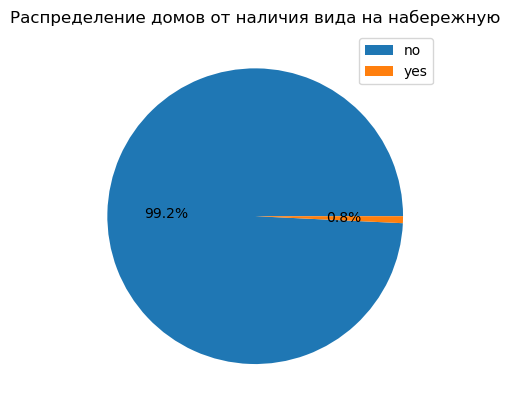

In [13]:
plt.pie(waterfront_type.values, autopct='%.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(['no', 'yes'])

;

На диаграмме видно, что подавляющая часть домов не имеет вид на набережную и составляет 99,2% от общего числа домов, и лишь жители 0,8% домов имеют вид на набережную. 

2.2. Изучите распределение этажей домов


In [14]:
floors_type = df['floors'].value_counts()
floors_type

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

''

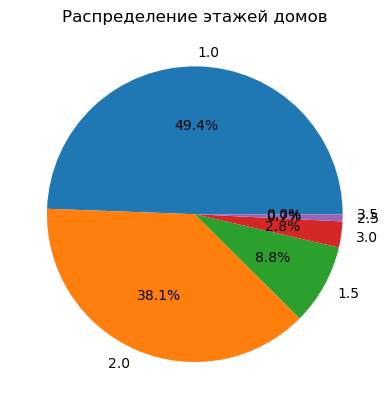

In [15]:
plt.pie(floors_type.values, labels=floors_type.index, autopct='%.1f%%')
plt.title('Распределение этажей домов')

;

На круговой диаграмме прелставлено распределение домов по количеству имеющихся у них этажей. Видим, что наиболее распространены одноэтажные (49,4%) и двухэтажные дома (38,1%). Дома с другим количеством этажей занимают незнаительную долю в общей массе имеющихся данных.

2.3. Изучите распределение состояния домов


In [16]:
condition_type = df['condition'].value_counts().sort_index(ascending=True)
condition_type

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

''

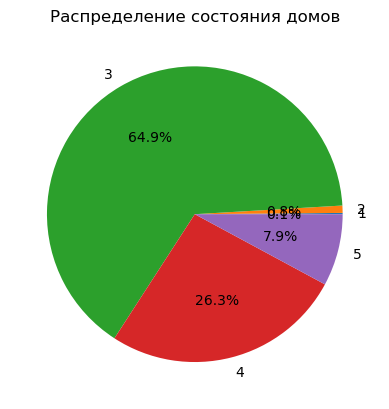

In [17]:
plt.pie(condition_type.values, labels=condition_type.index, autopct='%.1f%%')
plt.title('Распределение состояния домов')

;

На круговой диагремме наглядно продемонстрировано распределение состояния домов. Оценка в диапазоне от 1 до 5. Большинство домов находятся в удовлетворительном состоянии и имеют оценку 3 (64,9%), также четверть всех домов находятся в хорошем состоянии и имеют оценку 4 (26,3%), в отличном состоянии (имеют оценку 5) всего лишь 7,9% от всех домов, ну а неудовлетворительное и крайне неудовлетворительное состояние имеют лишь малая часть имеющихся в данных домов (2 - 0,8% и 1 - 0,1%, соответственно).

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [18]:
corr_matrix = df.corr(numeric_only=True).round(2)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


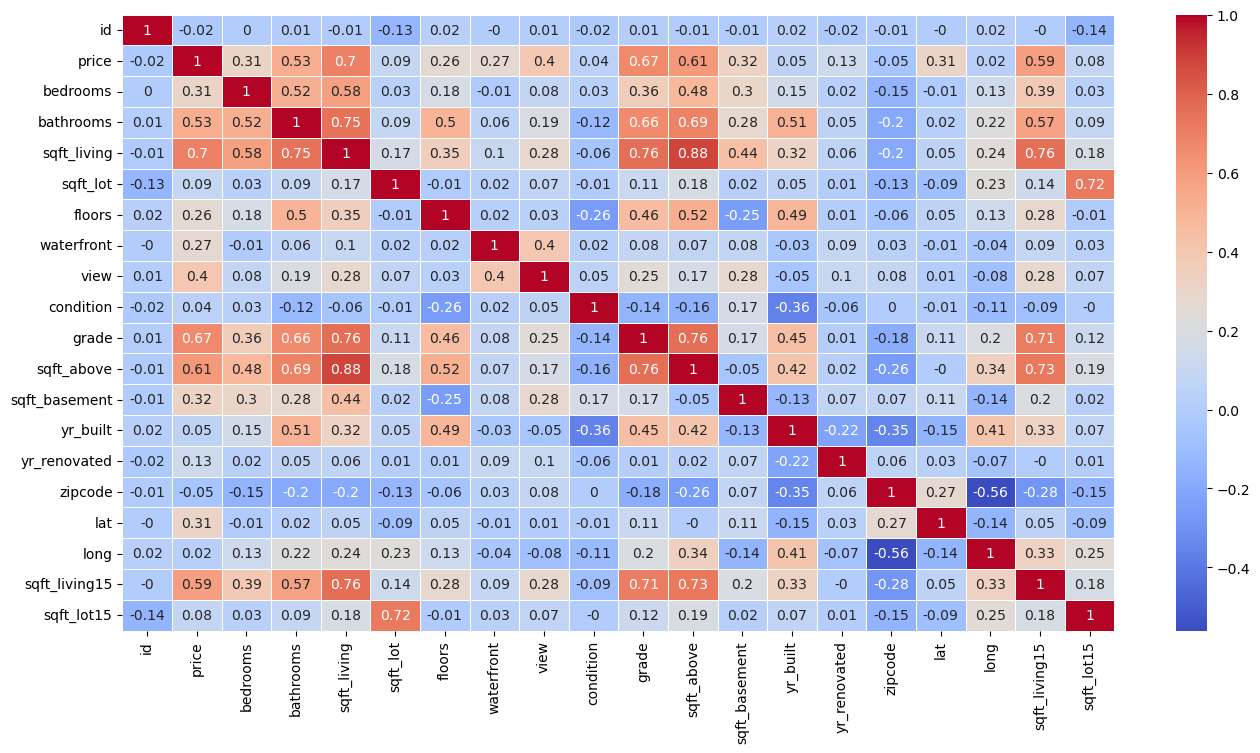

In [21]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

In [20]:
!pip install seaborn --upgrade

Чтобы было проще увидеть какие признаки в большей степени влияют на стоимость недвижимости построили матрицу корреляции и тепловую карту. Видим что наиболее значимые неповторяющиеся по сути коэффициенты корреляции с price у таких признаков, как:
- bathrooms (0.53)
- sqft_living (0.7)
- grade (0.67)
- sqft_above (0.61)
- view (0.4)

''

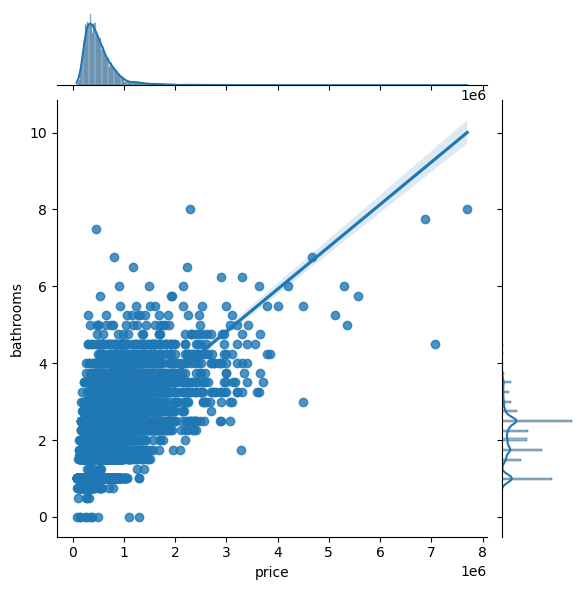

In [29]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
# plt.title('Взаимосвязь цены и количества ванных комнат')
;

График демонстрирует прямую зависимость цены дома от количества ванных комнат в нем - чем больше ванных, тем выше цена.

''

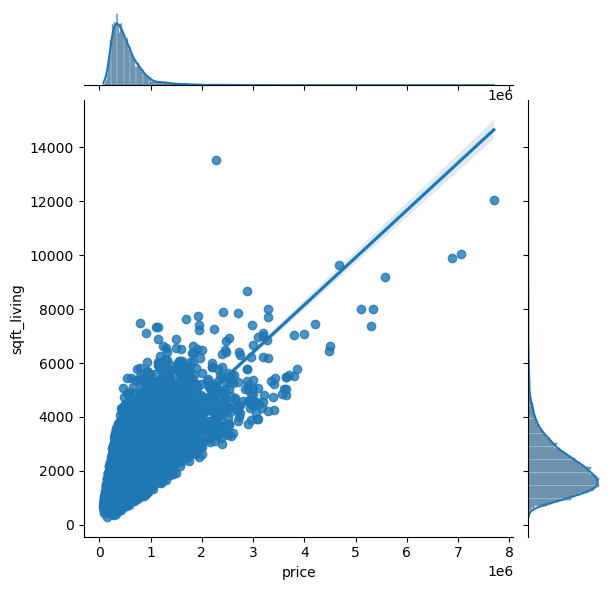

In [30]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
# plt.title('Взаимосвязь цены и количества жилой площади')
;

График демонстрирует прямую зависимость цены дома от количества жилой площади в этом доме - чем ее больше, тем выше цена.

''

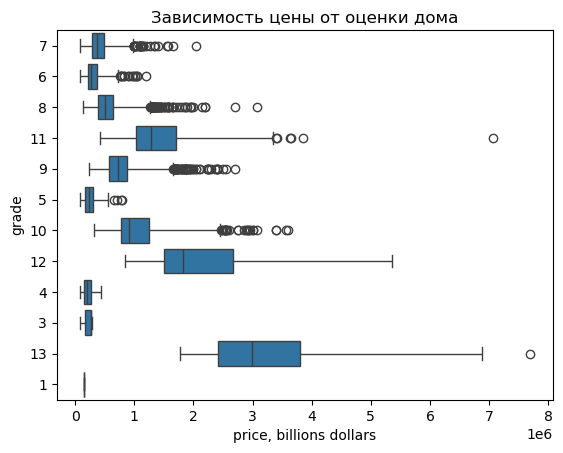

In [43]:
sns.boxplot(x=df['price'], y=df['grade'].astype(str), whis=2.5)
plt.title('Зависимость цены от оценки дома')
plt.xlabel('price, billions dollars')

;

На графике выше видим, что цена дома напрямую зависит от значения оценки дома, чем выше оценка дома, то есть его конструкция и дизайн лучше, тем выше его стоимость. Соответственно с большим отрывом видим, что дома с наивысшей оценкой 13 стоят дороже всего, и дальше по убыванию.

''

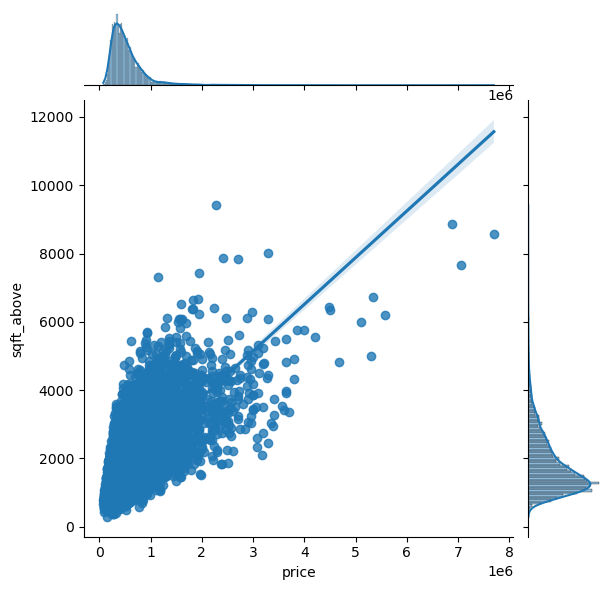

In [44]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg')
# plt.title('Взаимосвязь цены и количества кв.м. выше уровня земли')
;

На графике видно также наличие прямой зависимости от количества наземной площади и стоимостью дома, чем больше в доме квадратных метров выше уровня земли, тем выше его цена.

''

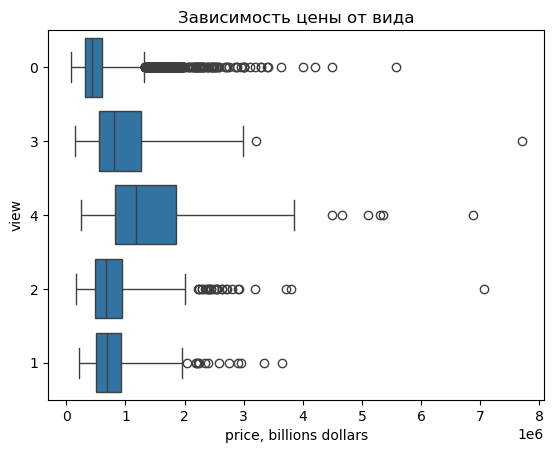

In [45]:
sns.boxplot(x=df['price'], y=df['view'].astype(str), whis=2.5)
plt.title('Зависимость цены от вида')
plt.xlabel('price, billions dollars')

;

На графике также как и на остальных видим прямую зависимость цены дома от вида из его окон, но тут не все так однозначно и есть особые случаи, когда, например, дома с оценкой вида 0 или 2 (то есть довольно низкой) стоят очень много. Объясняется это тем, что это скорее всего исключения и на цену оказали влияние какие то признаки из описанных в графиках выше, потому что их коэффициент гораздо выше чем у такого показателя как view. Но тем не менее общая картина такова, что дороже всего дома, у которых максимально хороший вид из окон, и наоборот - дешевле всего дома с плохим видом из окон.